# BANK CUSTOMER CHURN PREDICTION
DATA: https://www.kaggle.com/mathchi/churn-for-bank-customers

In [3]:
#load necccessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load dataset
churn = pd.read_csv('churn.csv')
data = churn.copy()

In [5]:
#check size of the observation and variable
data.shape

(10000, 14)

In [6]:
#load the first 5 rows of data in the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Load columns in the datasets
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#load information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Observation
We have 14 variables and 10000 observations in the dataset, also; We have 3 String variables. (Surname, Geography, Gender).
We have 11 numerical variables. (RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited)

### Checking for missing data

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Observation
There are no missing value in this data

## Dropping Irrelevant Features
Dropping variables that does not have an effect on the problem to be solved ["RowNumber","CustomerId","Surname"]

In [10]:
data.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Statistics of the data

In [11]:
stats = data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


## DATA VISUALIZATION

## Importing libraries

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Analyzing target variable

([<matplotlib.patches.Wedge at 0x7fee9f552fd0>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Not Exited'),
  Text(0.9625561556222189, -0.7165791284106559, 'Exited')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.5614910907796276, -0.41800449157288255, '20.4%')])

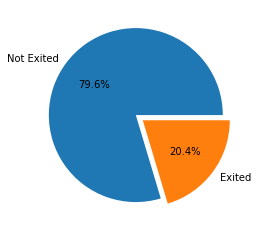

In [13]:
# Finding percentage of Exited and Non-Exited bank customer
x=data['Exited'].value_counts()
labels=['Not Exited','Exited']
plt.pie(x,explode=[0.0,0.1],labels=labels,autopct='%1.1f%%')


## Observation:
From the given data, it is visible that around 20% of the people have exited or churned. So, we can try to create a machine learning model that can predict whether a customer will exit the bank or not given his/her banking data.

In [14]:
# Finding no. of exited and non exited bank customer  
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

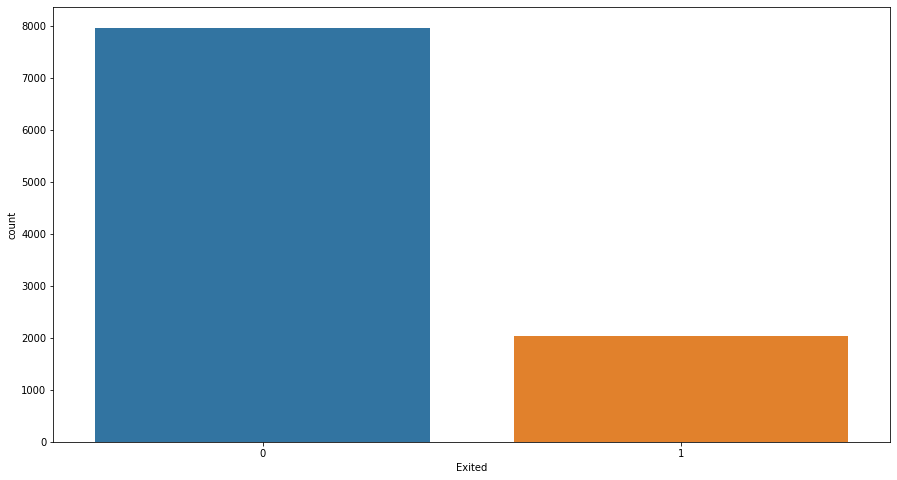

In [15]:
plt.figure(figsize = (15,8))
sns.countplot('Exited', data = data)
plt.show()

# Analyzing Categorical Features

In [16]:
# Count column plots to map the dependence of 'Exited' column on categorical features
cat_data = data[['Gender', 'Tenure','Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

Male      5457
Female    4543
Name: Gender, dtype: int64


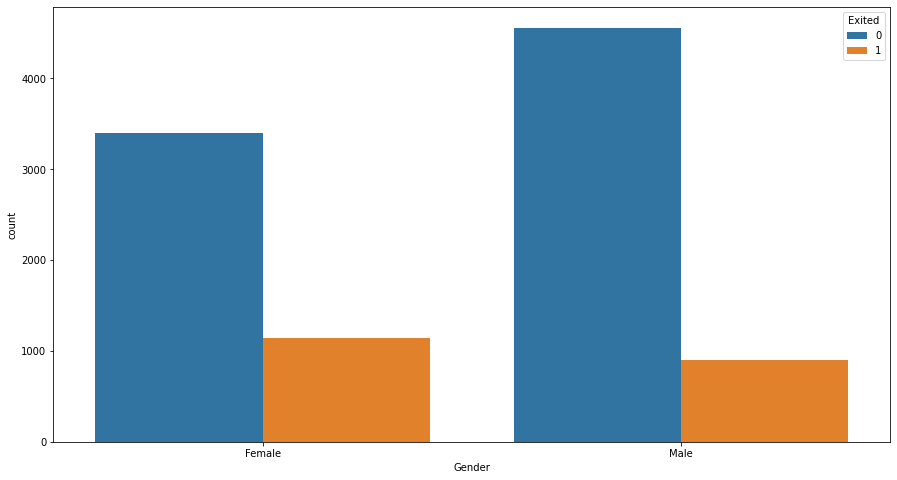

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


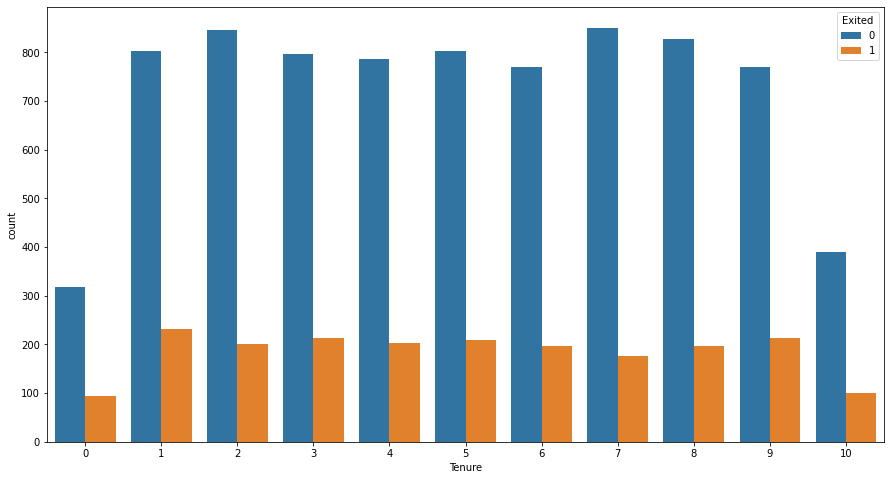

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


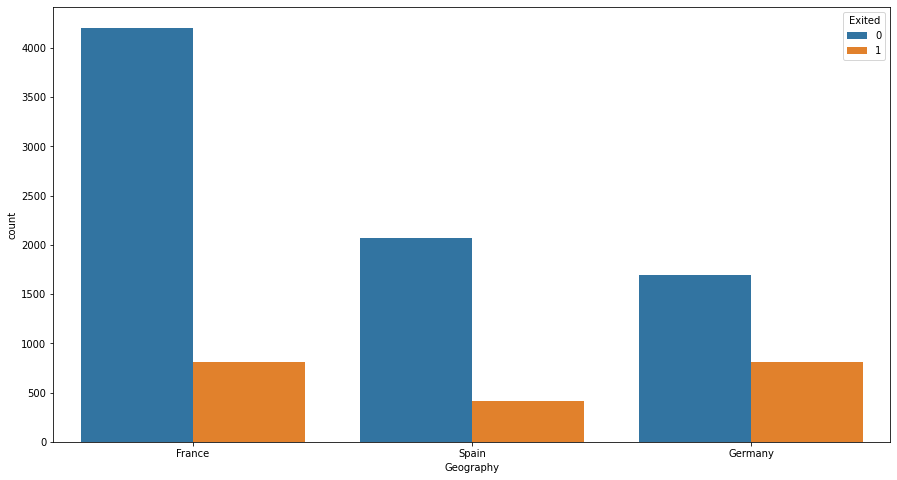

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


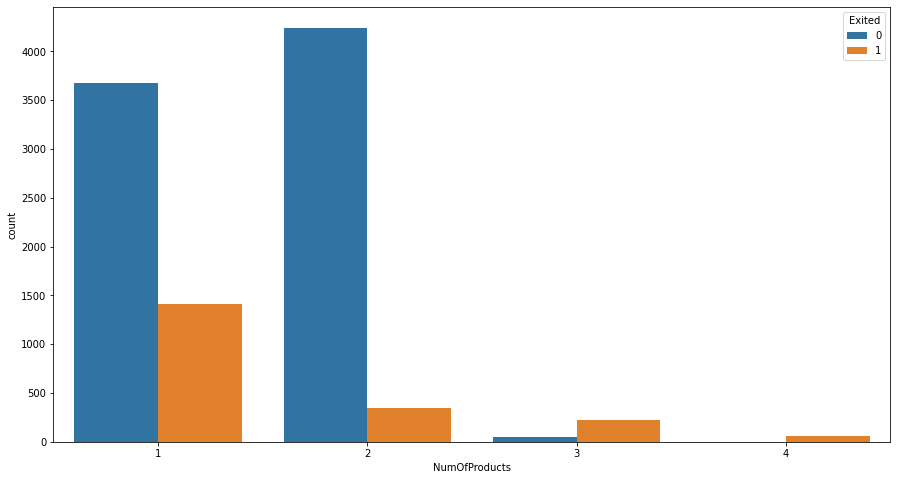

1    7055
0    2945
Name: HasCrCard, dtype: int64


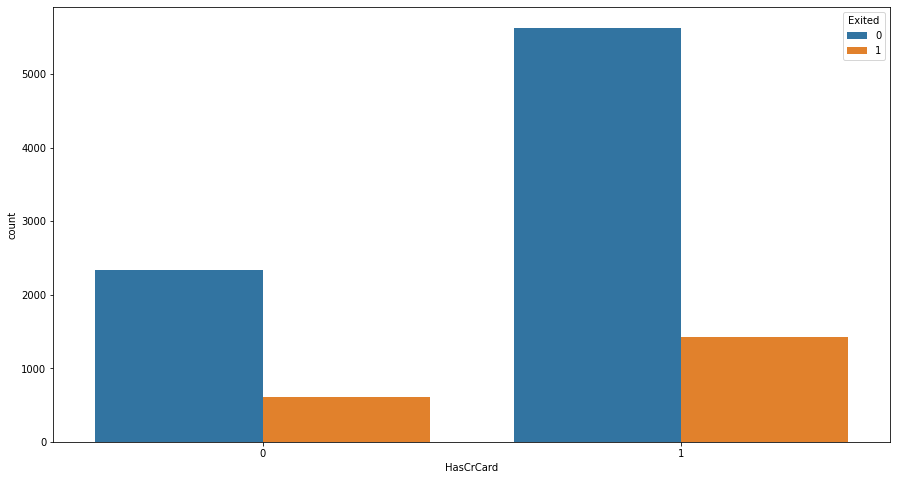

1    5151
0    4849
Name: IsActiveMember, dtype: int64


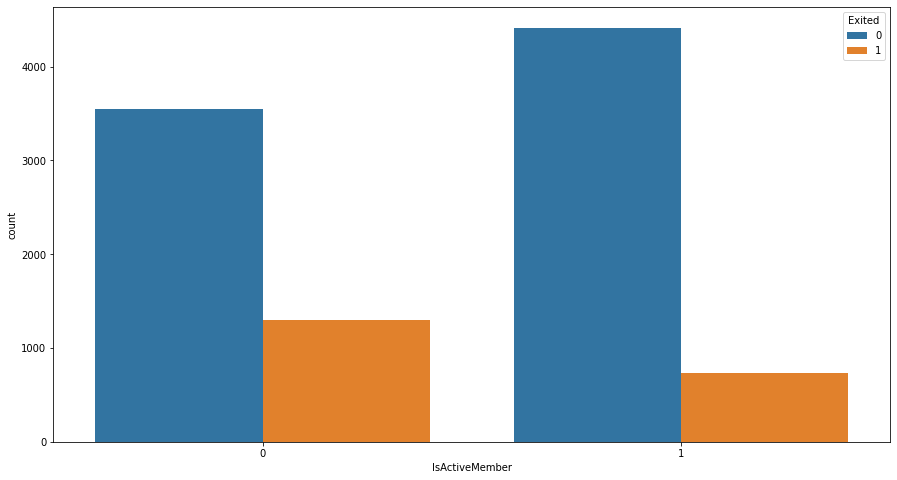

In [17]:
def categorical(var):
    print(data[var].value_counts())
    
    plt.figure(figsize = (15,8))
    sns.countplot(x = var, data = data, hue = 'Exited')
    plt.show()
    
for i in cat_data:
    categorical(i)

 ## Observation

+ Geography: We can see that majority of the data is about people France. Ideally for an evenly-distributed data, if the amount of people from a place is the majority, then the majority of churning should also be within that group. However, it is not so in this case as we see that number of exited people who belong to Germany is almost equal to the number of exits from France.
+ Gender: We can clearly see the Female customers had more exits than the male customers.
+ Credit cards: It is generally expected that people who have more interactions and products of the bank, would likely be retained for a longer time. However, we can see that people who have credit cards have more exits than those who do not own credit cards.
+ Active Member: This is an expected observation. We can see that inactive members have been churned more than members who are active.
+ Number of Products: This is also an expected observation, where we see that customers who own more products from the bank are likely to be retained for a longer time than those who own less products.
+ Tenure: We see that the tenure of a customer does not really tell us much if that customer is likely to be churned or not. Initially, it looks like new joinees and older people (10 years) have been churned less. However, on a closer analysis we can see that the overall number of retained customer are significantly less in both these cases. As a result, we can probably conclude that new joinees and older customers may be more likely to be churned as their churn rate (percentage) is likely to be higher than other tenure rates.

# Data Distribution- Numeric and continuous data

In [18]:
Num_data = data[[ 'Age', 'CreditScore', 'Balance', 'EstimatedSalary' ]]

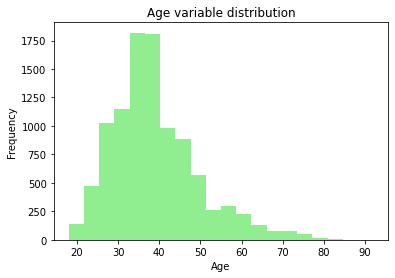

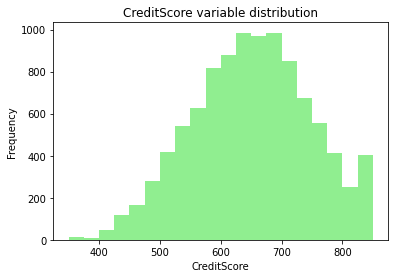

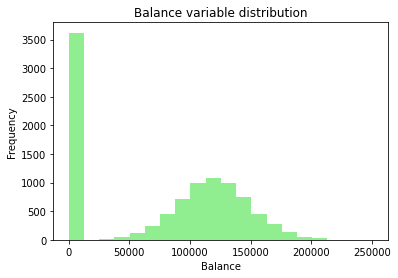

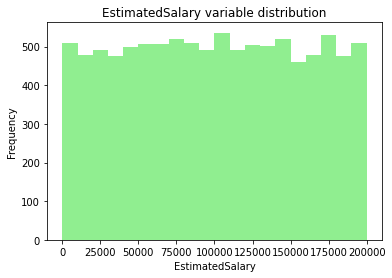

In [19]:
def numerical(var):

    plt.hist(data[var], bins = 20, color = "lightgreen")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(var))
    plt.show()
    
for i in Num_data:
    numerical(i)

# Observation
Credit Score variable is skewed to the left.

The age variable is skewed to the right.

Since the ratio of the balance variable is too much, it is added to the left.

EstimatedSalary variable displayed a normal distribution.

## VISUALISING OUTLIERS AND REMOVAL

In [20]:
list_order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

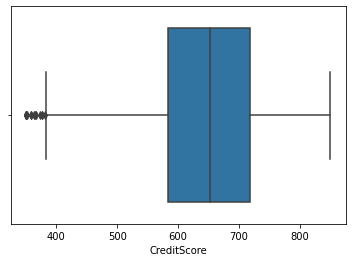

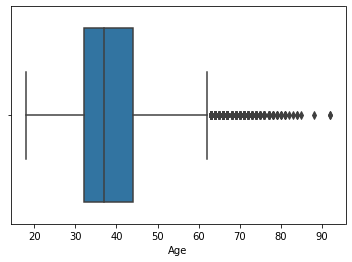

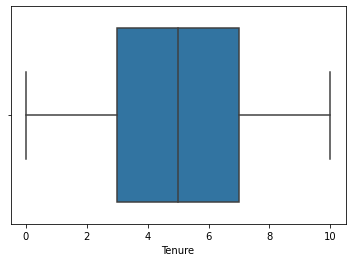

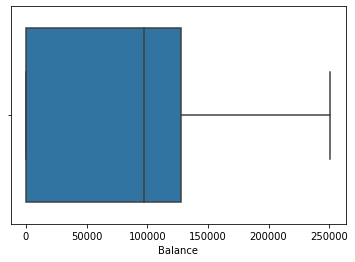

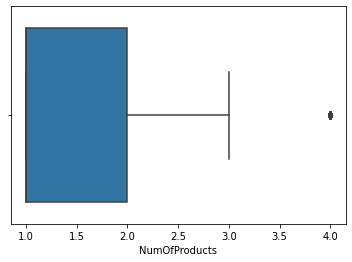

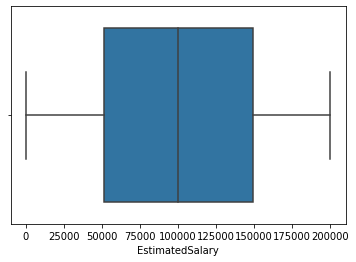

In [21]:
def viz_outliers(var):

    sns.boxplot(data[var])
    plt.show()
    
for i in list_order:
    viz_outliers(i)

## Observation
There is presence of outliers in CreditScore, Age, NumOfProducts, Now lets go further to remove and clean the outliers

## Remove Outliers

In [22]:
# CreditScore, Age, NumOfProducts have outliers
outliers = ['Age','CreditScore','NumOfProducts']

In [23]:
# create a function to remove the outliers
def outlier_removal(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    point_low = q1 - 1.5 * iqr
    point_high = q3 + 1.5 * iqr
    cleaned_data = data.loc[(data[column] >  point_low) & (data[column] <  point_high)]
    return cleaned_data

In [24]:
# clean the dataset by removing outliers
data_cleaned = outlier_removal(outlier_removal(outlier_removal(data,'Age'),'CreditScore'),'NumOfProducts')

print(data.shape)
print(data_cleaned.shape)

(10000, 11)
(9516, 11)


## CORRELATION MATRIX OF THE DATA

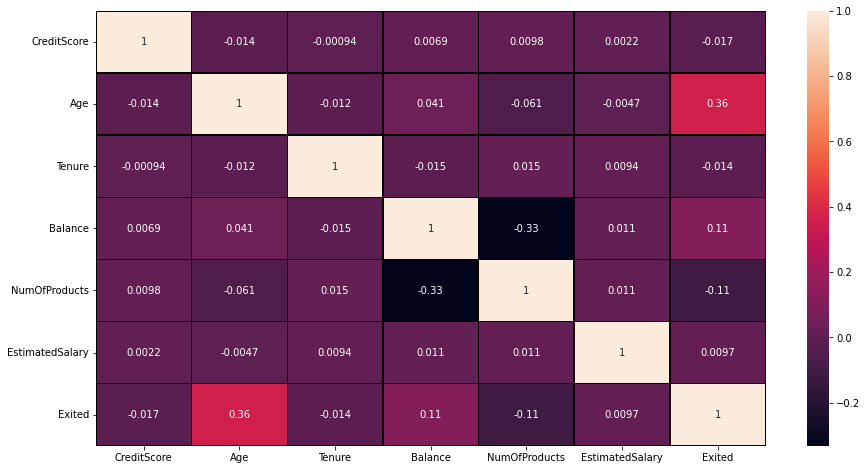

In [25]:
plt.figure(figsize = (15,8))
list_corr = ['CreditScore' ,'Age' ,'Tenure' ,'Balance' ,'NumOfProducts' ,'EstimatedSalary' ,'Exited']
sns.heatmap(data_cleaned[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5) 

## Obsevation:
1. Age has the strongest relation with Exited (0.36). Here we can make the following comment: As the age of the customer increases, the rate of losing the customer increases. (Positive strong relationship)



## Analyzing how numerical variable relates with the target variable (exited)

## AGE AND EXIT
What impact does age has on exit varible?

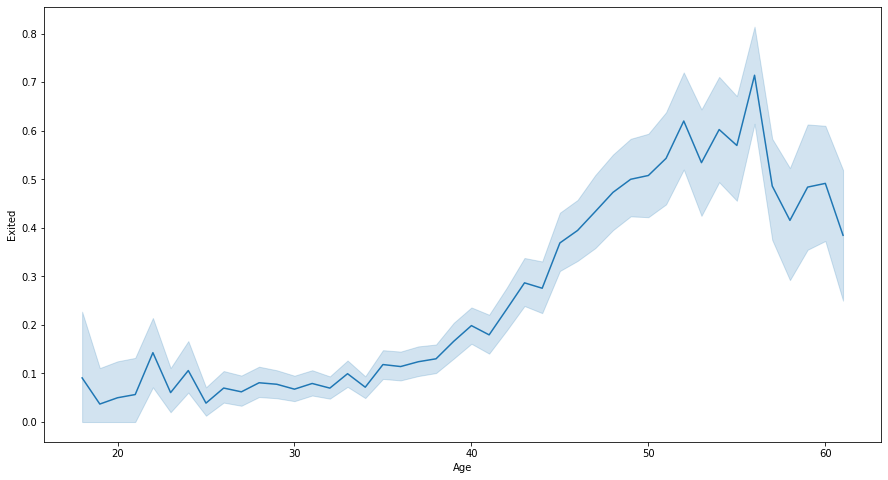

In [26]:
plt.figure(figsize = (15,8))
sns.lineplot(x = "Age", y = "Exited", data = data_cleaned)

In [27]:
data_cleaned.groupby(data_cleaned["Exited"])["Age"].mean()

Exited
0    36.089197
1    43.793583
Name: Age, dtype: float64

## Observation

As the age of the customer increases, the rate of losing the customer increases. 
(Positive strong relationship observed from correlation matrix)

1. Average age of customers who did not leave the bank == 36
2. Average age of customers leaving the bank == 43

# FEATURE ENGINEERING

In [28]:
# Use one hot encoding for categorical data like Geography and Gender
data_cleaned=pd.get_dummies(data_cleaned,drop_first=True)
data_cleaned.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [29]:
data_cleaned['Exited'].value_counts()

0    7646
1    1870
Name: Exited, dtype: int64

From the above value counts of Exited column we can say that there are 7646 customers are retained customer
and 1870 customers are churned customers so data is haighly imbalanced data so before modelling we can balanced the data using SMOTE

In [30]:
X=data_cleaned.drop('Exited',axis=1)
y=data_cleaned['Exited']

# Splitting the dataset in Training set and Test set

## Importing Libraries

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
Xstandard_train=sc.fit_transform(X_train)
Xstandard_test=sc.transform(X_test)

In [36]:
Xstandard_train.shape

(6661, 11)

In [37]:
Xstandard_test.shape

(2855, 11)

# Handling the Imbalanced Data

In [38]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_res,y_res=SMOTE(random_state=42).fit_resample(Xstandard_train,y_train)

In [41]:
y_res.value_counts()

0    5352
1    5352
Name: Exited, dtype: int64

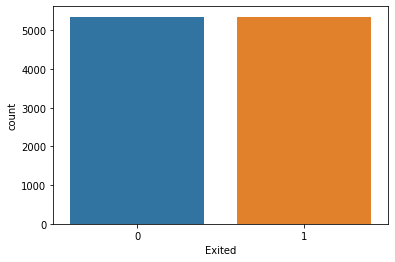

In [42]:
sns.countplot(y_res)

# Model Selection and Evaluation
1. Models to try:
  + Logistic Regression
  + KNeighbors classifier
  + Decision Tree Classifier
  + Random forest Classifier
  + XGBoost Classifier
2. Model Evaluation
  + Estimate Model performance using Accuracy score
  + ROC curve (Receiver Operating Characteristic Curve)
  + AUC (Area under curve)

# Model Selection

In [43]:
# Import Libraries necessary for model buildig and for accuracy metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
import xgboost as xgboost
from xgboost import XGBClassifier

### Logistic Regression

In [44]:
LR=LogisticRegression()
LR.fit(X_res,y_res)
y_pred_log=LR.predict(Xstandard_test)

In [45]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      2294
           1       0.39      0.72      0.50       561

    accuracy                           0.72      2855
   macro avg       0.65      0.72      0.65      2855
weighted avg       0.81      0.72      0.75      2855



In [46]:
print('Accuracy score for logistic regression model is',accuracy_score(y_test, y_pred_log))

Accuracy score for logistic regression model is 0.7208406304728546


### K Neighbors Classifier

In [47]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_res,y_res)
y_pred_knn=knn.predict(Xstandard_test)

In [48]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2294
           1       0.43      0.68      0.53       561

    accuracy                           0.76      2855
   macro avg       0.67      0.73      0.68      2855
weighted avg       0.81      0.76      0.78      2855



In [49]:
print("Accuracy score of KNN model: ", accuracy_score(y_test, y_pred_knn))

Accuracy score of KNN model:  0.76077057793345


### Decision Tree Classifier

In [50]:
tree=DecisionTreeClassifier()
tree.fit(X_res,y_res)
y_pred_tree=tree.predict(Xstandard_test)

In [51]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      2294
           1       0.45      0.56      0.50       561

    accuracy                           0.78      2855
   macro avg       0.67      0.69      0.68      2855
weighted avg       0.80      0.78      0.79      2855



In [52]:
print("Accuracy score of Decision Tree model: ",accuracy_score(y_test, y_pred_tree))

Accuracy score of Decision Tree model:  0.7786339754816112


### Random Forest Classifier

In [53]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_res,y_res)
y_pred_rf=rf.predict(Xstandard_test)

In [54]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2294
           1       0.59      0.58      0.58       561

    accuracy                           0.84      2855
   macro avg       0.74      0.74      0.74      2855
weighted avg       0.84      0.84      0.84      2855



In [55]:
print("Accuracy score of Random Forest model: ", accuracy_score(y_test, y_pred_rf))

Accuracy score of Random Forest model:  0.8378283712784589


### XGBoost

In [56]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_res,y_res)
y_pred_xgb=xgb.predict(Xstandard_test)

In [57]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2294
           1       0.55      0.69      0.61       561

    accuracy                           0.83      2855
   macro avg       0.73      0.78      0.75      2855
weighted avg       0.85      0.83      0.83      2855



In [58]:
print("Accuracy score of XGB model: ", accuracy_score(y_test, y_pred_xgb))

Accuracy score of XGB model:  0.8273204903677759


 ## Model Evaluation
+ Accuracy Score
+ Confusion Matrix
+ ROC and Area under Curve

## Accuracy score Performance

In [59]:
Performance_summary=pd.DataFrame({
    'Model':['LR ','KNN ','DT','RFC','XGB '],
    'Accuracy Score':[accuracy_score(y_test, y_pred_log),
               accuracy_score(y_test, y_pred_knn),
               accuracy_score(y_test, y_pred_tree),
               accuracy_score(y_test, y_pred_rf),
               accuracy_score(y_test, y_pred_xgb)]
})
Performance_summary

,Model,Accuracy Score
0,LR,0.720841
1,KNN,0.760771
2,DT,0.778634
3,RFC,0.837828
4,XGB,0.827320


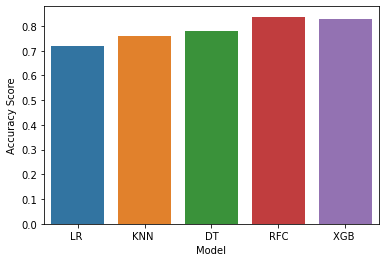

In [60]:
sns.barplot(Performance_summary['Model'],Performance_summary['Accuracy Score'])

### summary: 
The best model amonst the ones implemented is Random Forests with an accuracy of almost 83%.

## Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
print('Logistic_Regression \n', confusion_matrix(y_test, y_pred_log))
print('KNN \n', confusion_matrix(y_test, y_pred_knn))
print('Decision tree \n', confusion_matrix(y_test,y_pred_tree ))
print('Random forest \n', confusion_matrix(y_test, y_pred_rf))
print('XGBoost \n', confusion_matrix(y_test, y_pred_xgb))

Logistic_Regression 
 [[1655  639]
 [ 158  403]]
KNN 
 [[1793  501]
 [ 182  379]]
Decision tree 
 [[1911  383]
 [ 249  312]]
Random forest 
 [[2069  225]
 [ 238  323]]
XGBoost 
 [[1975  319]
 [ 174  387]]


## ROC-AUC evaluation

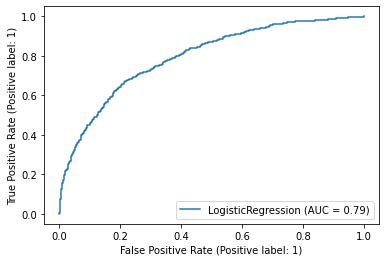

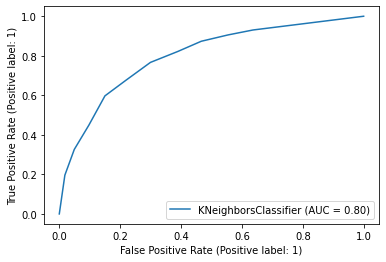

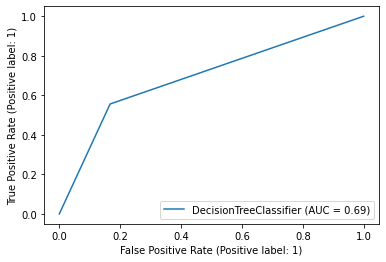

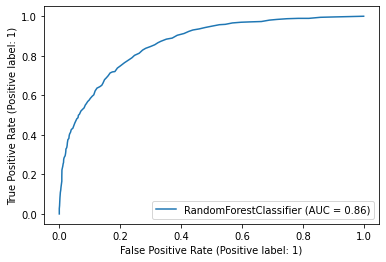

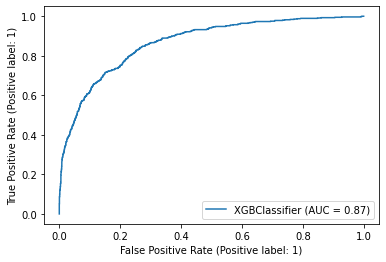

In [62]:
# Evaluate model using Area under Curve to evaluate best performed model

from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR, Xstandard_test, y_test) 
plot_roc_curve(knn, Xstandard_test, y_test) 
plot_roc_curve(tree, Xstandard_test, y_test) 
plot_roc_curve(rf, Xstandard_test, y_test)
plot_roc_curve(xgb, Xstandard_test, y_test) 

plt.show()

###### Observation
From the above graph, we can clearly see that the Random Forest (RF) classifier has the highest AUC score (0.86) and hence covers the highest area under curve as well. From this, we finally choose the Random Forest classifier with its optimal parameters as our final machine learning classifier model.

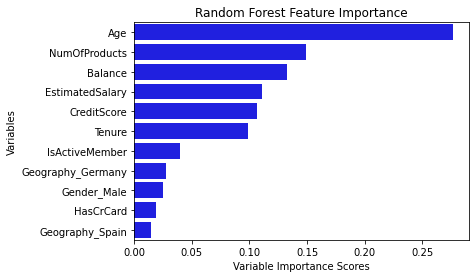

In [64]:
#feature importance of random forest model i.e the most importance predictive feature (variables) in the model performance
feature_index = data_cleaned.loc[:, X.columns ]

feature_importance = pd.Series(rf.feature_importances_, 
                               index=feature_index.columns).sort_values(ascending=False)
                               
sns.barplot(x = feature_importance, y = feature_importance.index, color='b')
plt.xlabel('Variable Importance Scores')
plt.ylabel('Variables')
plt.title('Random Forest Feature Importance')
plt.show()

## Save The Model

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [66]:
import joblib

In [71]:
joblib.dump(rf,'/content/rf_model')

['/content/rf_model']

In [72]:
model_rf=joblib.load('/content/rf_model')

In [74]:
print("Enter CRedit score")
CreditScore = int(input())
print("Enter Age :")
Age = int(input())
print("Enter Tenure :")
Tenure = int(input())
print("Enter Current Balance :")
Balance = float(input())
print("Enter Number of Products :")
NumOfProducts = int(input())
print("Has Credit Card ? ('Yes': 1,'No': 0) :")
HasCrCard = int(input())
print("Is Active Member ? ('Yes': 1,'No': 0) :")
IsActiveMember = int(input())
print("Enter Estimated Salary :")
EstimatedSalary = float(input())
print("Enter Geography_Spain ('spain':0 ) :")
Geography_Spain = int(input())
print("Enter Geography_Germany ('Germany':0 ) :")
Geography_Germany = int(input())
print("Enter Gender_Male ('Male': 0,'Female': 1) :")
Gender_Male = int(input())

Enter CRedit score
258
Enter Age :
70
Enter Tenure :
5
Enter Current Balance :
5264
Enter Number of Products :
4
Has Credit Card ? ('Yes': 1,'No': 0) :
1
Is Active Member ? ('Yes': 1,'No': 0) :
1
Enter Estimated Salary :
2564896.25
Enter Geography_Spain ('spain':0 ) :
0
Enter Geography_Germany ('Germany':0 ) :
0
Enter Gender_Male ('Male': 0,'Female': 1) :
1


In [75]:
X_user = ([[CreditScore,Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary,Geography_Spain,Geography_Germany,Gender_Male]])

In [77]:
model_rf=joblib.load(r"/content/rf_model")

In [78]:
y_pred = model_rf.predict(X_user)
model_rf.predict(X_user)
y_pred[0]

1

In [79]:
index = y_pred[0]
if index == 1:
    print("Customer might soon exit the Bank, Please take Action !!")
else:
    print("Customer will not exit the Bank")
    #print("Customer might soon exit the Bank, Please take Action !!")

Customer might soon exit the Bank, Please take Action !!
